### **Solemne 3 parte 2 FMSA315 Ariel Pérez D.**

### Indicaciones

- Subir un documento PDF con el desarrollo de los siguientes problemas.

- Indique las  hipotesis a probar en los casos que  corresponda  y cuál criterio está utilizando para  tomar la decisión de  aceptar o rechazar la hipótesis nula.


Usaremos el dataset "diamonds" de Seaborn para todas las preguntas. Este dataset incluye variables como precio (en dólares), peso (en quilates), calidad del corte, color, claridad, dimensiones (x, y, z), profundidad y ancho de la mesa. El conjunto de datos incluye especificamente las siguientes variables:


1. price: El precio del diamante en dólares estadounidenses.
2. carat: El peso del diamante, medido en quilates. Un quilate es igual a 0.2 gramos.
3. cut: La calidad del corte del diamante, que influye en su brillo y simetría. Esta variable se clasifica en categorías como Fair, Good, Very Good, Premium e Ideal.
4. color: La clasificación del color del diamante. En la industria del diamante, los colores se clasifican de D (sin color) a J (color ligeramente amarillo).
5. clarity: La claridad del diamante, que se refiere a la ausencia de imperfecciones internas (inclusiones) o externas (defectos de superficie). Las categorías varían desde IF (Internally Flawless, sin inclusiones visibles bajo una lupa de 10x) hasta I1 (inclusiones visibles a simple vista).
6. x: La longitud en mm del diamante.
7. y: La anchura en mm del diamante.
8. z: La profundidad en mm del diamante.
9. depth: El porcentaje de profundidad total, que es la profundidad (de la parte superior a la parte inferior del diamante) dividida por el ancho medio del diamante. Esta medida afecta a la reflexión interna de la luz y, por tanto, al brillo del diamante.
10. table: El porcentaje del ancho de la parte superior del diamante en relación con el ancho total. La "mesa" es la parte superior plana del diamante.


In [31]:
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import statsmodels.api as sm
import matplotlib.pyplot as plt

solemne3 = sns.load_dataset('diamonds')
solemne3.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**

**Pregunta 1:** Calcula un intervalo de confianza del 95% para la media del precio de los diamantes.


In [32]:
precios = solemne3['price']

# Intervalo de confianza del 95% para la media
intervalo_confianza = stats.norm.interval(0.95, loc=precios.mean(), scale=stats.sem(precios))

print("Intervalo de confianza del 95% para la media del precio:", intervalo_confianza)


Intervalo de confianza del 95% para la media del precio: (3899.1327133652603, 3966.466730461214)


**Pregunta 2:** Determina el intervalo de confianza del 99% para la proporción de diamantes con un corte 'Ideal'.

In [33]:
# Cantidad de diamantes con corte 'Ideal'
num_ideal = len(solemne3[solemne3['cut'] == 'Ideal'])

# Total de diamantes
total_diamantes = len(solemne3)

# Proporción de diamantes con corte 'Ideal'
proporcion_ideal = num_ideal / total_diamantes

# Intervalo de confianza del 99% para la proporción
intervalo_confianza_proporcion = sm.stats.proportion_confint(num_ideal, total_diamantes, alpha=0.01)

print("Intervalo de confianza del 99% para la proporción de diamantes con corte 'Ideal':", intervalo_confianza_proporcion)


Intervalo de confianza del 99% para la proporción de diamantes con corte 'Ideal': (0.39410422952066565, 0.4049688146024341)


**Test de Hipótesis** (15  puntos) 

**Pregunta 3:** Realiza un test de hipótesis para determinar si la media del precio de los diamantes es significativamente mayor  que $4000.

(Considera una significancia del 5% en estas preguntas)

In [34]:
# Hipótesis nula (H0): La media es igual a $4000
# Hipótesis alternativa (H1): La media es mayor a $4000
hipotesis_nula = 4000

# Indica que estamos probando si la media es mayor a $4000
hipotesis_alternativa = 'greater'  

# Test de hipótesis
t_statistic, p_valor = ttest_1samp(precios, hipotesis_nula, alternative=hipotesis_alternativa)

print("Estadístico t:", t_statistic)
print("Valor p:", p_valor)

nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula. Hay evidencia significativa para afirmar que la media es mayor a $4000.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No podemos afirmar que la media sea mayor a $4000.")



Estadístico t: -3.9121421974108177
Valor p: 0.9999542034566214
No hay suficiente evidencia para rechazar la hipótesis nula. No podemos afirmar que la media sea mayor a $4000.


**Pregunta 4:** Prueba si la media de precio del corte tipo 'Good' es significativamente mayor que la media de precio del corte tipo 'Premium.

(Considera una significancia del 5% en estas preguntas)

In [35]:
# Precios para los cortes 'Good' y 'Premium'
precios_good = solemne3[solemne3['cut'] == 'Good']['price']
precios_premium = solemne3[solemne3['cut'] == 'Premium']['price']

# Test de hipótesis para comparar las medias
t_statistic, p_valor = ttest_ind(precios_good, precios_premium, equal_var=False)

print("Estadístico t:", t_statistic)
print("Valor p:", p_valor)

nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula. Hay evidencia significativa para afirmar que la media de 'Good' es mayor que la de 'Premium'.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No podemos afirmar que la media de 'Good' sea mayor que la de 'Premium'.")


Estadístico t: -10.192914587265602
Valor p: 2.7951686873072873e-24
Rechazamos la hipótesis nula. Hay evidencia significativa para afirmar que la media de 'Good' es mayor que la de 'Premium'.


**Regresión Lineal Múltiple** (30 puntos) 

**Pregunta 5:**  Construya un modelo de regresión lineal múltiple donde el precio sea la variable dependiente y el peso, porcentaje de profundidad total, porcentaje del ancho de la parte superior del diamante en relación con el ancho total sean las variables independientes. 

In [36]:
# Variables independientes
variables_independientes = solemne3[['carat', 'depth', 'table']]

# Agregar una constante al modelo (intercepto)
variables_independientes = sm.add_constant(variables_independientes)

# Variable dependiente
variable_dependiente = solemne3['price']

# Modelo de regresión lineal múltiple
modelo = sm.OLS(variable_dependiente, variables_independientes).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:15:13   Log-Likelihood:            -4.7194e+05
No. Observations:               53940   AIC:                         9.439e+05
Df Residuals:                   53936   BIC:                         9.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.3e+04    390.918     33.264      0.0

**Pregunta 6:** Analiza la significancia de los coeficientes, el ajuste del modelo (R²), la significancia de cada variable regresora y la normalidad de los residuos.

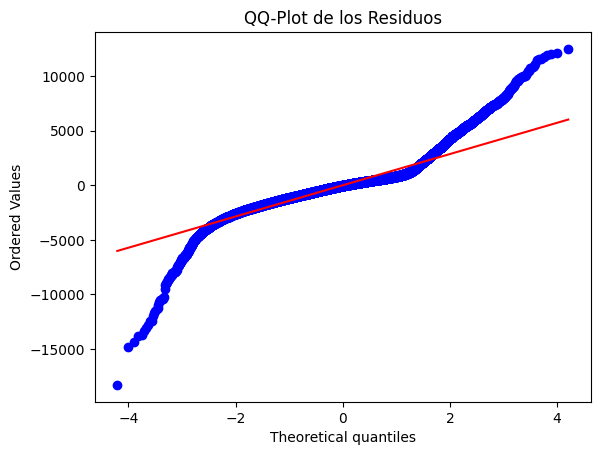

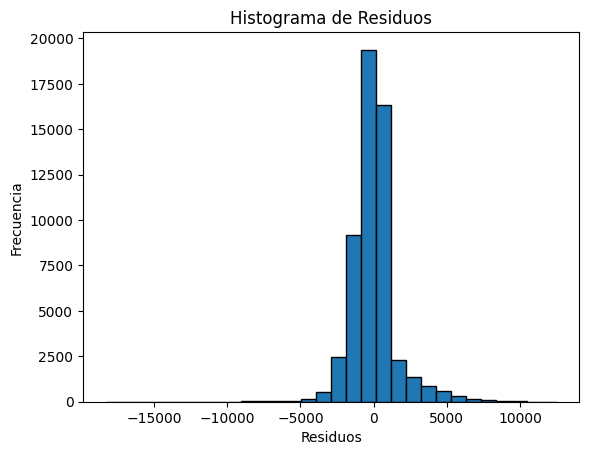

In [37]:
# Residuos del modelo
residuos = modelo.resid

# QQ-plot
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("QQ-Plot de los Residuos")
plt.show()

# Histograma de residuos
plt.hist(residuos, bins=30, edgecolor='black')
plt.title("Histograma de Residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()


El coeficiente de determinación (R²) es igual a 0.854. Esto indica que aproximadamente el 85.4% de la variabilidad en el precio de los diamantes se explica por las variables incluidas en el modelo, que son el peso (carat), el porcentaje de profundidad total (depth), y el porcentaje del ancho de la parte superior del diamante en relación con el ancho total (table).